In [1]:
import tensorflow as tf

In [11]:
mnist = tf.keras.datasets.mnist #28x28 images of hand-written digits from 0 to 9

(x_train, y_train), (x_test, y_test) = mnist.load_data() #setting up test and train data

#normalizing the data. The values ranged from 0-255, normalized it to 0-1
x_train = tf.keras.utils.normalize(x_train, axis=1) 
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential() #feedforward
model.add(tf.keras.layers.Flatten()) #we want to flatten the 28x28 - input layer
model.add(tf.keras.layers.Dense(128, activation =tf.nn.relu)) #128 units/neurons, relu=rectify linear
model.add(tf.keras.layers.Dense(128, activation =tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation =tf.nn.softmax)) #softmax probability distribution

#parameters for the training of the model.
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics = ['accuracy'])


model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 2s 815us/step - loss: 0.2638 - accuracy: 0.9237
Epoch 2/3
1875/1875 [==============================] - 2s 864us/step - loss: 0.1083 - accuracy: 0.9671
Epoch 3/3
1875/1875 [==============================] - 2s 826us/step - loss: 0.0723 - accuracy: 0.9772


In [13]:
#evaluate the model
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 0s 568us/step - loss: 0.0882 - accuracy: 0.9731
0.08824935555458069 0.9731000065803528


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

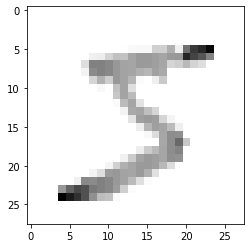

In [10]:
#view of the data

import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show

print(x_train[0])

In [14]:
#saved the model to be used later

model.save('num_reader.model')

INFO:tensorflow:Assets written to: num_reader.model\assets


In [16]:
new_model = tf.keras.models.load_model('num_reader.model')

In [17]:
predictions = new_model.predict([x_test])

In [18]:
print(predictions)

[[8.87611122e-08 2.37283793e-08 9.10013114e-06 ... 9.99968410e-01
  2.52769610e-07 4.09209224e-06]
 [6.18496920e-10 1.87800603e-03 9.97984767e-01 ... 7.64309434e-08
  3.10434132e-08 7.16960736e-12]
 [9.78763293e-09 9.99874115e-01 5.37133155e-06 ... 1.01381498e-04
  1.49768066e-05 1.46641327e-07]
 ...
 [1.47972719e-08 1.49332118e-06 4.02564666e-08 ... 9.91869601e-05
  8.20751939e-06 7.78267160e-04]
 [1.24612211e-06 3.65504235e-07 3.08675361e-08 ... 2.01648575e-07
  2.79030716e-03 1.44759014e-07]
 [9.99478402e-07 4.45490222e-08 1.18006746e-07 ... 1.14931631e-09
  1.90154515e-06 4.98145136e-10]]


In [19]:
#used numpy coz it was easier hehe. cleaned up predictions.

import numpy as np
print(np.argmax(predictions[0]))

7


<function matplotlib.pyplot.show(close=None, block=None)>

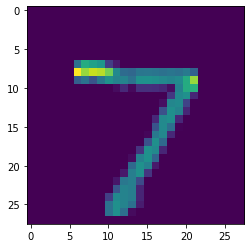

In [20]:
plt.imshow(x_test[0])
plt.show

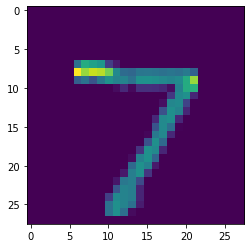

7


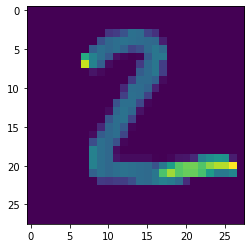

2


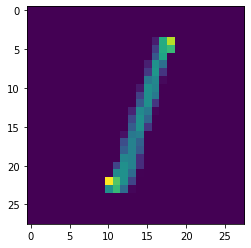

1


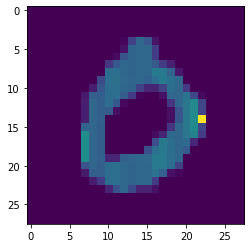

0


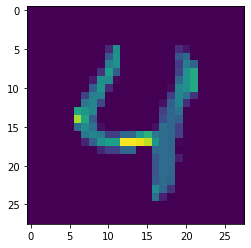

4


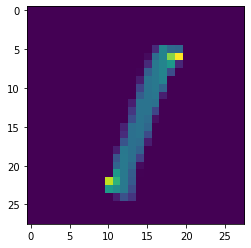

1


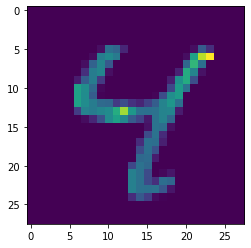

4


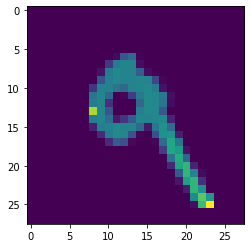

9


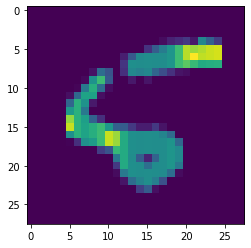

5


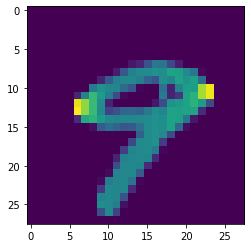

9


In [28]:
#testing out the prediction model 

for x in range(10):
    plt.imshow(x_test[x])
    plt.show()
    print(np.argmax(predictions[x]))

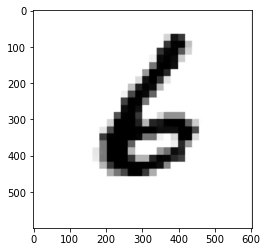

In [32]:
#formatting my own data to match MNIST dataset format

import cv2

#loading the image
file = r'D:\Machine Learning Project\6.png'
test_image = cv2.imread(file, cv2.IMREAD_GRAYSCALE)

#previewing the image
plt.imshow(test_image, cmap = 'gray')

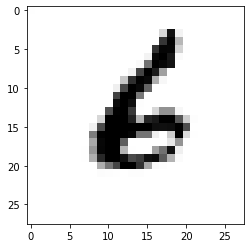

In [35]:
#format image
img_resized = cv2.resize(test_image, (28,28), interpolation=cv2.INTER_LINEAR)
img_resized = cv2.bitwise_not(img_resized)

#preview the newly formatted image
plt.imshow(img_resized, cmap='binary')

In [36]:
#inputting my data into a list because predictions needs to be fed a list
my_data = []
my_data.append(img_resized)

In [38]:
#normalizing the data to match what my model expects
my_data= tf.keras.utils.normalize(my_data, axis=1) 

In [42]:
#print(my_data[0])

6


<function matplotlib.pyplot.show(close=None, block=None)>

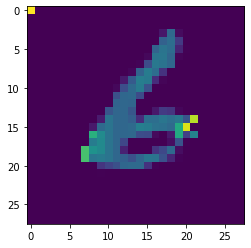

In [41]:
predictions = new_model.predict([my_data])
print(np.argmax(predictions[0]))
plt.imshow(my_data[0])
plt.show